In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [2]:
img_array = cv2.imread("Research Dataset/latest/augmented/0/AF02NES.jpg")
img_array.shape

(224, 224, 3)

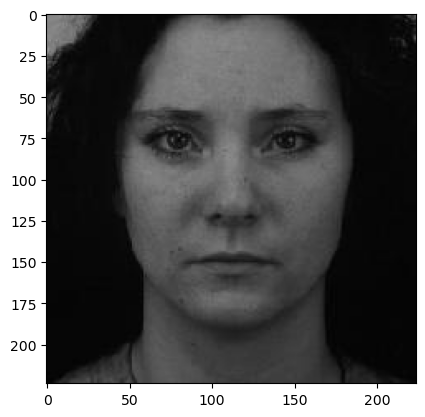

In [3]:
plt.imshow(img_array)

In [4]:
data_directory = "Research Dataset/latest/augmented/"

In [5]:
Classes = ["0","1","2","3"]

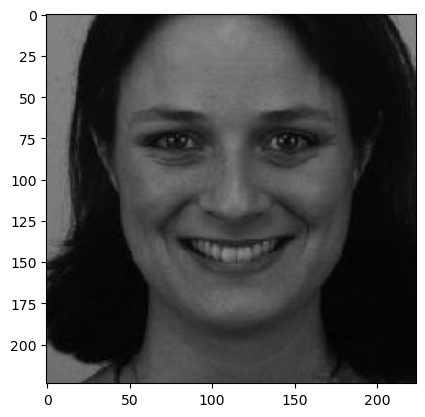

In [6]:
for category in Classes:
  path = os.path.join(data_directory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

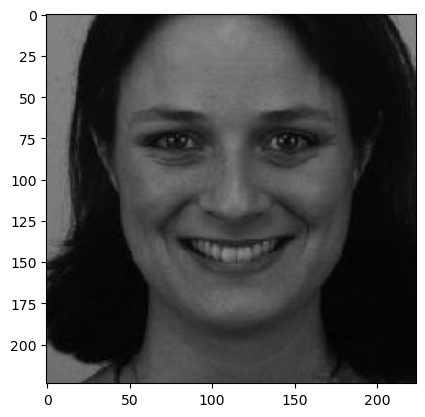

In [7]:
img_size = 224
new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
new_array.shape

(224, 224, 3)

In [9]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(data_directory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [10]:
create_training_data()

In [11]:
print(len(training_data))

8085


In [12]:
temp = np.array(training_data)

C:\Users\Nisal Daksith\AppData\Local\Temp\ipykernel_12032\645717107.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_data)


In [13]:
temp.shape

(8085, 2)

In [14]:
random.shuffle(training_data)

In [15]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size, 3)

In [16]:
x.shape

(8085, 224, 224, 3)

In [17]:
x = x/255.0 

In [18]:
x.shape

(8085, 224, 224, 3)

In [19]:
y = np.array(y)

In [20]:
y.shape

(8085,)

In [21]:
###### Transfer Learning

In [22]:
model = tf.keras.applications.MobileNetV2() ### Pre trained model

In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [24]:
base_input = model.layers[0].input

In [25]:
base_output = model.layers[-2].output

In [26]:
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [27]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [28]:
final_output_1 = layers.Dense(128)(base_output)
final_output_2 = layers.Activation('relu')(final_output_1)
final_output_3 = layers.Dense(64)(final_output_2)
final_output_4 = layers.Activation('relu')(final_output_3)
final_output_5 = layers.Dense(4, activation = 'softmax')(final_output_4)

In [29]:
final_output_5

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_2')>

In [30]:
emotion_identifier = keras.Model(inputs = base_input, outputs = final_output_5)

In [31]:
emotion_identifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [32]:
emotion_identifier.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]) 

In [33]:
emotion_identifier.fit(x,y, epochs = 25)

Epoch 1/25
253/253 [==============================] - 248s 953ms/step - loss: 1.0001 - accuracy: 0.5944
Epoch 2/25
253/253 [==============================] - 234s 926ms/step - loss: 0.7745 - accuracy: 0.6978
Epoch 3/25
253/253 [==============================] - 227s 896ms/step - loss: 0.6756 - accuracy: 0.7375
Epoch 4/25
253/253 [==============================] - 228s 901ms/step - loss: 0.5985 - accuracy: 0.7766
Epoch 5/25
253/253 [==============================] - 230s 907ms/step - loss: 0.5382 - accuracy: 0.8026
Epoch 6/25
253/253 [==============================] - 230s 910ms/step - loss: 0.4890 - accuracy: 0.8184
Epoch 7/25
253/253 [==============================] - 221s 872ms/step - loss: 0.4442 - accuracy: 0.8385
Epoch 8/25
253/253 [==============================] - 214s 847ms/step - loss: 0.3820 - accuracy: 0.8573
Epoch 9/25
253/253 [==============================] - 217s 856ms/step - loss: 0.3405 - accuracy: 0.8711
Epoch 10/25
253/253 [==============================] - 223s 881m

In [34]:
emotion_identifier.save("emotion_identifier_model_2.h5")